<a href="https://colab.research.google.com/github/MindEvo/Cancer-ML/blob/main/Cancer_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###############
# MOUNT DRIVE #
###############
from google.colab import drive
drive.mount('/content/drive')

####################
# IMPORT LIBRARIES #
####################
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
location = '/content/drive/MyDrive/Colab-Data-Files/Cancer_Data.csv'
data = pd.read_csv(location)

############
# CHECK IT #
############
data.head(20)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#######################
# Drop the ID column  #
#######################
data = data.drop(columns = ["id"])
data["diagnosis"] = data["diagnosis"].map({"M": '1', "B": '0'})

#############
# Check it  #
#############
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#############################################
# Setup the feature matrix and label vector #
#############################################
X = np.array(data[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se",	"perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]])
Y = np.array(data[["diagnosis"]])

###################
# Split the data  #
###################
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')


In [ ]:
shape = [X_train.shape[1]]

In [ ]:
#####################
# Create the model  #
#####################
model = Sequential()

model.add(BatchNormalization(input_shape = shape))
model.add(Dense(16,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(16,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Ba  (None, 30)                120       
 tchNormalization)                                               
                                                                 
 dense_30 (Dense)            (None, 16)                496       
                                                                 
 dropout_25 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                     

In [ ]:
#####################
# Compile the model #
#####################
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#################
# Fit the model #
#################
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1)


Epoch 1/100
41/41 [==============================] - 6s 8ms/step - loss: 0.6508 - accuracy: 0.5770 - val_loss: 1.1331 - val_accuracy: 0.3043
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7433 - val_loss: 0.8796 - val_accuracy: 0.3261
Epoch 3/100
41/41 [==============================] - 0s 5ms/step - loss: 0.4833 - accuracy: 0.8191 - val_loss: 0.5977 - val_accuracy: 0.6739
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 0.3778 - accuracy: 0.8802 - val_loss: 0.4310 - val_accuracy: 0.8478
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8704 - val_loss: 0.3110 - val_accuracy: 0.9565
Epoch 6/100
41/41 [==============================] - 0s 5ms/step - loss: 0.3005 - accuracy: 0.8851 - val_loss: 0.2454 - val_accuracy: 0.9348
Epoch 7/100
41/41 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.8949 - val_loss: 0.2221 - val_accuracy: 0.9348
Epoch 8/100
4

In [ ]:
###########################
# Test the model accuracy #
###########################
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy}")


4/4 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9649
Test Accuracy: 0.9649122953414917


In [ ]:
#########################
# Use model to predict  #
#########################
predictions = model.predict(X_test)
predictions = [1 if p > 0.5 else 0 for p in predictions]


4/4 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(Y_test, predictions))
print(f"AUC: {roc_auc_score(Y_test, predictions)}")


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        81
         1.0       1.00      0.88      0.94        33

    accuracy                           0.96       114
   macro avg       0.98      0.94      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC: 0.9393939393939394


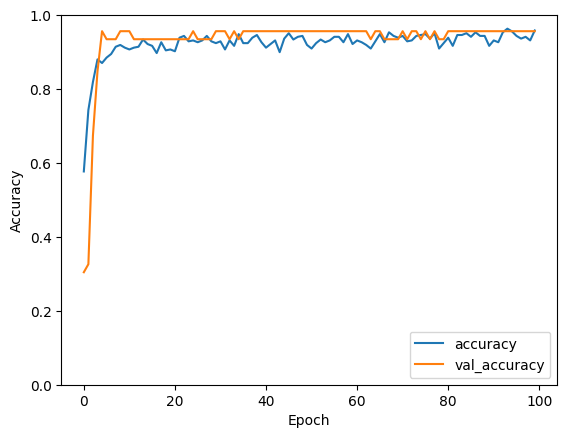

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
